## Data augmenation : goal


The reasons of why we want to create new data are the following :
- the train dataset categories are really imballanced (30% professors vs 1% rappers)
- the accuracy score is the macro f1 score. This means that we have to be equally good at predicting all categories.

# Data and Libraries

In [101]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk
import random
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
DATA_PATH = "data defi ia/"
df = pd.read_json(DATA_PATH+"/train.json")
test_df = pd.read_json(DATA_PATH+"/test.json")
df_label = pd.read_csv(DATA_PATH+"/train_label.csv")
categories_label = pd.read_csv(DATA_PATH+'/categories_string.csv')

In [18]:
df = df.merge(df_label,on='Id')
df['job'] = categories_label.loc[df['Category'].values,'0'].values
df.head()

,Id,description,gender,Category,job
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F,19,professor
1,1,He is a member of the AICPA and WICPA. Brent ...,M,9,accountant
2,2,Dr. Aster has held teaching and research posi...,M,19,professor
3,3,He runs a boutique design studio attending cl...,M,24,architect
4,4,"He focuses on cloud security, identity and ac...",M,24,architect


# Cleaning

The only cleaning transformation applied here is that we `lower` the data so that all words are lower case. 
Hence `research`and `Research` will be considered as similar word.

You might want to look at other cleaning step such that removing stopwords, stemming words, etc.

In [19]:
df["description_lower"] = [x.lower() for x in df.description]
test_df["description_lower"] = [x.lower() for x in test_df.description]

In [20]:
from sklearn.model_selection import train_test_split

df_train, df_validation = train_test_split(df, test_size = .1, random_state= 42)

## Visualizing disparity in the training dataset :

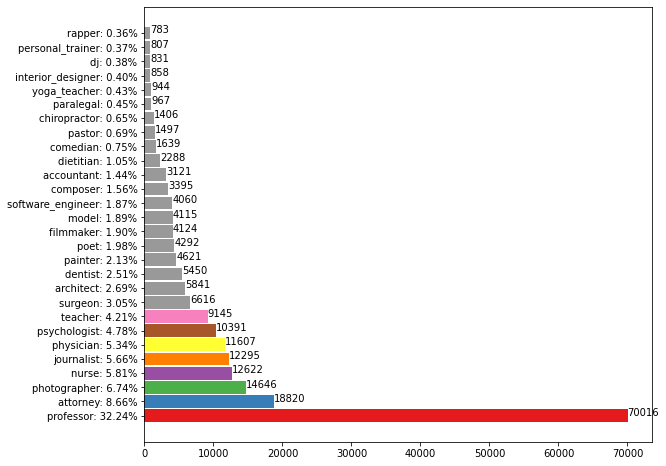

In [25]:
CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(28)]


data_count = df['Category'].astype(int).value_counts()
#Rename index to add percentage
new_index = [categories_label['0'][k]+ ": %.2f%%" %(v*100/len(df)) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (20,8))
ax = fig.add_subplot(1,2,1)
ax.barh(range(28), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(28):
    ax.text(data_count.values[k], k, str(data_count.values[k]))

plt.show()

## Generating new descriptions :

In this cell, for every possible job, we extract sentences from the first 400 descriptions. Then we randomly pick from 3 to 5 sentences in this bag of sentences in order to generate a new description.

For a given job, we generate new descriptions until the total number of descriptions (real + fake) for that job is equal to the number of descriptions for the job "professor". This way we will obtain a balance dataset. Hopefully it will help a futur model at performing better.

In [ ]:
for i in range(28):
    job = categories_label['0'][i]
    cat = categories_label['1'][i]
    df_job = df.loc[df['job']==job,]
    

    new_fake_descriptions = []
    n_fake_descriptions = data_count.max() - len(df_job)
    print(job, n_fake_descriptions)

    for _ in tqdm(range(n_fake_descriptions)):
        sum_descriptions = df_job['description_lower'].values[:400].sum()
        bag_of_sentences = nltk.sent_tokenize(sum_descriptions)


        random_selection = random.sample(bag_of_sentences,random.sample([3,4,5],1)[0])
        new_description = ''

        for sent in random_selection :
            new_description += sent+ ' '
        new_fake_descriptions.append(new_description)

    new_labels_job = [job] * n_fake_descriptions
    new_labels_cat = [cat] * n_fake_descriptions

    fake_df = pd.DataFrame({"descriptions_lower":new_fake_descriptions,
                           "Category":new_labels_cat,
                           "job":new_labels_job})

    fake_df.to_csv(f'fake_data/fake_df_{job}')


  0%|                                                                                | 2/68519 [00:00<59:34, 19.17it/s]

pastor 68519


 28%|█████████████████████▎                                                      | 19186/68519 [16:00<43:11, 19.04it/s]